<a href="https://colab.research.google.com/github/qweliant/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [280]:
# TODO
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [281]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [288]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [289]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [290]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [291]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [292]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [293]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


# Merge

pd.merge()

In [294]:
print(income.shape)
print(lifespan.shape)

(46513, 3)
(44370, 3)


In [0]:
# merged = pd.merge(income, lifespan, how='inner', on=['geo', 'time'])
# #inner drops all nan
# print(merged.shape)
# merged.head()

In [296]:
merged = pd.merge(income, lifespan, how='outer', on=['geo', 'time'])
#keeps everything
print(merged.shape)
merged.head()

(50446, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603.0,28.21
1,afg,1801,603.0,28.20
2,afg,1802,603.0,28.19
3,afg,1803,603.0,28.18
4,afg,1804,603.0,28.17


In [297]:
merged = pd.merge(merged, population, how='outer', on=['geo', 'time'])
#keeps everything
print(merged.shape)
merged.head()

(62794, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603.0,28.21,3280000.0
1,afg,1801,603.0,28.20,3280000.0
2,afg,1802,603.0,28.19,3280000.0
3,afg,1803,603.0,28.18,3280000.0
4,afg,1804,603.0,28.17,3280000.0


In [0]:
# merged = pd.merge(income, lifespan, how='left', on=['geo', 'time'])
# # left keeps allrows of left dataset


# print(merged.shape)
# merged.head()

In [0]:
# merged = pd.merge(income, lifespan, how='right', on=['geo', 'time'])
# # right keeps all rows of right dataset

# print(merged.shape)
# merged.head()

In [300]:
df = pd.merge(merged, entities[['country', 'name', 'world_4region', 'world_6region', 'main_religion_2008']], left_on='geo',right_on='country')
print(df.shape)
df.head()

(62794, 10)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region,main_religion_2008
0,afg,1800,603.0,28.21,3280000.0,afg,Afghanistan,asia,south_asia,muslim
1,afg,1801,603.0,28.20,3280000.0,afg,Afghanistan,asia,south_asia,muslim
2,afg,1802,603.0,28.19,3280000.0,afg,Afghanistan,asia,south_asia,muslim
3,afg,1803,603.0,28.18,3280000.0,afg,Afghanistan,asia,south_asia,muslim
4,afg,1804,603.0,28.17,3280000.0,afg,Afghanistan,asia,south_asia,muslim


In [0]:
df = df.rename(columns = {
   'country': 'country_code',
   'time': 'year',
   'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
   'life_expectancy_years': 'lifespan',
   'population_total': 'population',
   'name': 'country',
   'world_6region': '6region',
   'world_4region': '4region',
   'main_religion_2008': 'religion'
})


In [302]:
df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,religion
0,afg,1800,603.0,28.21,3280000.0,afg,Afghanistan,asia,south_asia,muslim
1,afg,1801,603.0,28.20,3280000.0,afg,Afghanistan,asia,south_asia,muslim
2,afg,1802,603.0,28.19,3280000.0,afg,Afghanistan,asia,south_asia,muslim
3,afg,1803,603.0,28.18,3280000.0,afg,Afghanistan,asia,south_asia,muslim
4,afg,1804,603.0,28.17,3280000.0,afg,Afghanistan,asia,south_asia,muslim


In [303]:
usa = df[df.country == 'United States']
usa.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,religion
54782,usa,1800,2127.0,39.41,6801854.0,usa,United States,americas,america,christian
54783,usa,1801,2167.0,39.41,6933517.0,usa,United States,americas,america,christian
54784,usa,1802,2202.0,39.41,7067728.0,usa,United States,americas,america,christian
54785,usa,1803,2166.0,39.41,7204538.0,usa,United States,americas,america,christian
54786,usa,1804,2165.0,39.41,7343995.0,usa,United States,americas,america,christian


In [304]:
usa.describe()

,year,income,lifespan,population
count,301.000000,241.000000,219.000000,3.010000e+02
mean,1950.000000,19532.983402,54.846256,1.934886e+08
std,87.035433,21443.938657,15.202079,1.521702e+08
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1875.000000,3636.000000,39.410000,4.585433e+07
50%,1950.000000,8820.000000,51.780000,1.588044e+08
75%,2025.000000,29619.000000,70.270000,3.432558e+08
max,2100.000000,85571.000000,79.140000,4.474832e+08


In [305]:
usa[usa.year.isin([1818, 1918, 2018])]

,geo,year,income,lifespan,population,country_code,country,4region,6region,religion
54800,usa,1818,2258.0,39.41,9879049.0,usa,United States,americas,america,christian
54900,usa,1918,9371.0,47.18,106721812.0,usa,United States,americas,america,christian
55000,usa,2018,54898.0,79.14,326766748.0,usa,United States,americas,america,christian


In [306]:
china = df[df.country == 'China']
china.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,religion
9632,chn,1800,984.0,32.0,321675013.0,chn,China,asia,east_asia_pacific,eastern_religions
9633,chn,1801,984.0,32.0,324408862.0,chn,China,asia,east_asia_pacific,eastern_religions
9634,chn,1802,984.0,32.0,327165946.0,chn,China,asia,east_asia_pacific,eastern_religions
9635,chn,1803,984.0,32.0,329946461.0,chn,China,asia,east_asia_pacific,eastern_religions
9636,chn,1804,984.0,32.0,332750607.0,chn,China,asia,east_asia_pacific,eastern_religions


In [307]:
china[china.year.isin([1818, 1918, 2018])]

,geo,year,income,lifespan,population,country_code,country,4region,6region,religion
9650,chn,1818,985.0,32.00,3.741615e+08,chn,China,asia,east_asia_pacific,eastern_religions
9750,chn,1918,989.0,22.13,4.624445e+08,chn,China,asia,east_asia_pacific,eastern_religions
9850,chn,2018,16018.0,76.92,1.415046e+09,chn,China,asia,east_asia_pacific,eastern_religions


In [308]:
df.describe(exclude="number")

,geo,country_code,country,4region,6region,religion
count,62794,62794,62794,62794,62794,57451
unique,218,218,218,4,6,3
top,deu,deu,Albania,asia,europe_central_asia,christian
freq,301,301,301,18730,16546,39035


In [0]:
now = df[df.year.isin([2018])]

# Plot Some Shit

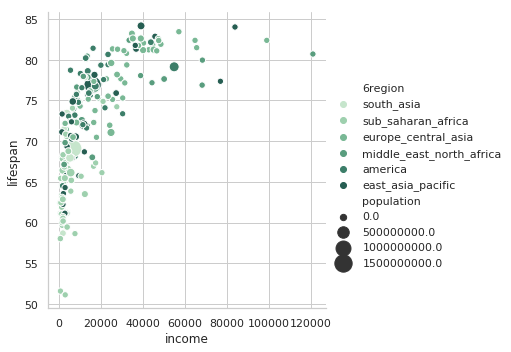

In [310]:
import seaborn as sns

# Load the example iris dataset
# diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset

#

plot = sns.relplot(x='income', y="lifespan",
                hue="6region", size="population",
                palette="ch:2.5,-.2,dark=.3",
                sizes=(40, 300), linewidth=1,
                data=now, legend='brief')





In [311]:
qatar = df[df.country == 'Qatar']
now_qatar = qatar[df.year.isin([2018])]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(43562    116033.0
Name: income, dtype: float64, 43562    81.71
Name: lifespan, dtype: float64, 'Qatar')

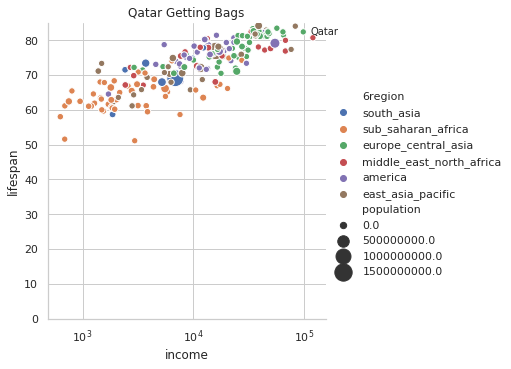

In [312]:
#Analyze outlier

plot = sns.relplot(x='income', y="lifespan",
                hue="6region", size="population",
                sizes=(40, 300), linewidth=1,
                data=now)


plt.xscale('log')
plt.ylim(0,85)
plt.title('Qatar Getting Bags')
plt.text(x=now_qatar.income-5000, y=now_qatar.lifespan+1, s='Qatar')


In [313]:
years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)]

centuries.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,religion
18,afg,1818,604.0,28.03,3308390.0,afg,Afghanistan,asia,south_asia,muslim
118,afg,1918,849.0,7.89,5704092.0,afg,Afghanistan,asia,south_asia,muslim
218,afg,2018,1867.0,58.69,36373176.0,afg,Afghanistan,asia,south_asia,muslim
319,ago,1818,668.0,26.98,1586896.0,ago,Angola,africa,sub_saharan_africa,christian
419,ago,1918,1174.0,12.01,3487015.0,ago,Angola,africa,sub_saharan_africa,christian


Text(0.5, 1.0, 'The World and Income 2018')

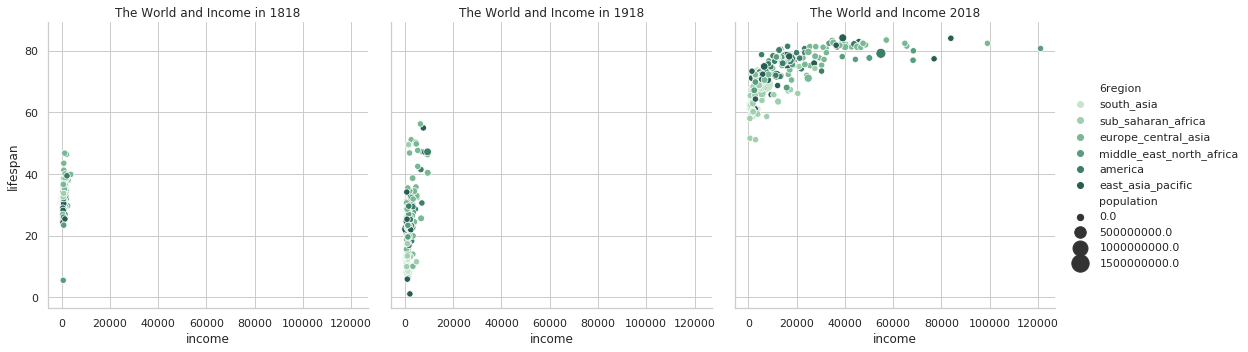

In [314]:
plot = sns.relplot(x='income', y="lifespan",
                hue="6region", size="population", col='year',
                palette="ch:2.5,-.2,dark=.3",
                sizes=(40, 300),
                data=centuries)

axes = plot.axes.flatten()
axes[0].set_title('The World and Income in 1818')

axes[1].set_title('The World and Income in 1918')

axes[2].set_title('The World and Income 2018')

In [0]:
years = [1920, 1942, 1998, 2018]

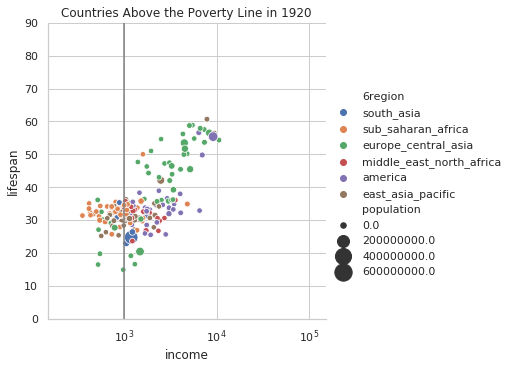

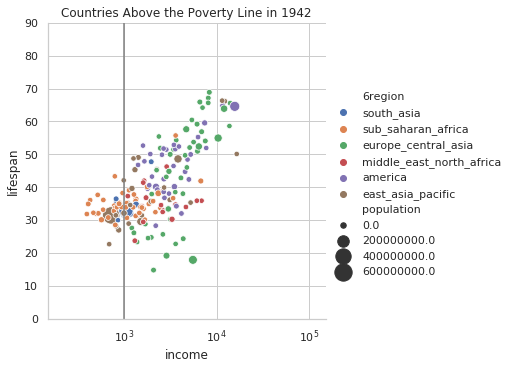

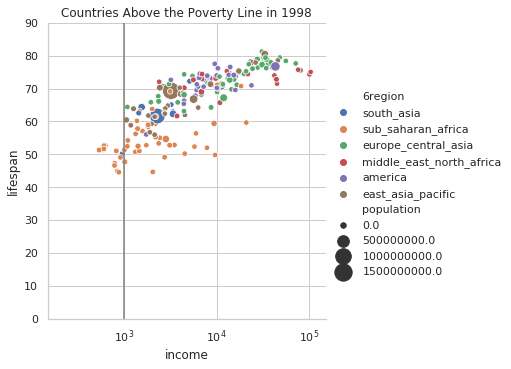

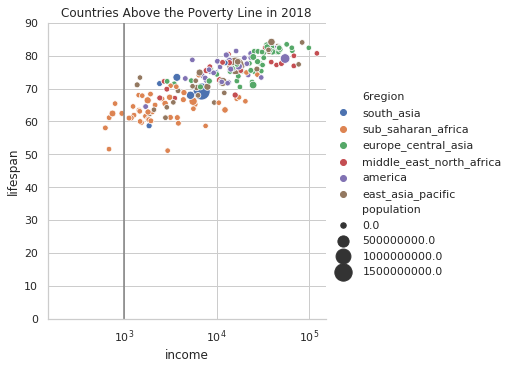

In [319]:
for year in years:
  sns.relplot(x='income', y="lifespan",
                hue="6region", size="population",
                sizes=(30, 300),
                data=df[df.year==year])
  
  plt.xscale('log')
  plt.xlim(150,150000)
  plt.ylim(0, 90)
  plt.title('Countries Above the Poverty Line in ' + str(year))
  plt.axvline(x=1000, color='grey')


In [317]:
import matplotlib.animation as animation


df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region,religion
0,afg,1800,603.0,28.21,3280000.0,afg,Afghanistan,asia,south_asia,muslim
1,afg,1801,603.0,28.20,3280000.0,afg,Afghanistan,asia,south_asia,muslim
2,afg,1802,603.0,28.19,3280000.0,afg,Afghanistan,asia,south_asia,muslim
3,afg,1803,603.0,28.18,3280000.0,afg,Afghanistan,asia,south_asia,muslim
4,afg,1804,603.0,28.17,3280000.0,afg,Afghanistan,asia,south_asia,muslim


# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO